# Merging geojson data and getting counts for community resources

This code merges all geojson datapoints from the community resources thus far collected (as of 10/23). 

TODO: identify time range within which we want to include features/resources. Much of this data comes from datasets submitted in 2015

TODO: merge crime data
```
change-log
- JMP 10/23/2020
```

In [52]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib
import matplotlib.cm as cm

%matplotlib inline

## Merging datasets with geospatial data

#### Adult Resources

In [18]:
PhillyMap = gpd.read_file('../data/base_geodata/Zipcodes_Poly.geojson')

- Housing counseling agencies are partially funded by the city through the division of housing and community development <--- Last Udated June 2019

In [3]:
# Housing Counseling

housing_resources = gpd.read_file('../data/adult_resources/HousingCounselingAgencies.geojson')
housing_resources['Resource_Category'] = "Adult Resources"
housing_resources['Resource'] = "Housing Counseling"
housing_resources['Description'] = housing_resources['AGENCY']

housing_resources = housing_resources[['Resource_Category',"Resource","Description","geometry"]]

#### City Buildings

- Hospitals are partly funded by state and local funds <--- data last updated 2015

In [4]:
Hospitals = gpd.read_file('../data/city_buildings/Hospitals.geojson')
Hospitals['Resource_Category'] = "City Buildings"
Hospitals['Resource'] = "Hospital"
Hospitals['Description'] = Hospitals['HOSPITAL_NAME']
Hospitals = Hospitals[['Resource_Category',"Resource","Description","geometry"]]

#### City Maintenance

In [5]:
landcare = gpd.read_file('../data/City_maintenance/PHS_PhilaLandCare_Maintenance.geojson')


- LandCare Program: has data ranging from 2015 - 2020. The program is partially funded by the city
- Wire baskets: maintained by the city. <--- data last updated 2016
- big belly baskets: also maintained by the city <--- data last updated 2015

In [6]:
# land care program
landcare = gpd.read_file('../data/City_maintenance/PHS_PhilaLandCare_Maintenance.geojson')
landcare['Resource_Category'] = "City Maintenance"
landcare['Resource'] = "Land Care Restoration"
landcare['Description'] = landcare['ADDRESS']
landcare['geometry'] = landcare.geometry.centroid
landcare = landcare[['Resource_Category',"Resource","Description","geometry"]]

# Street light
street_light = gpd.read_file('../data/City_maintenance/Street_Poles (2).geojson')
street_light['Resource_Category'] = "City Maintenance"
street_light['Resource'] = "Light Poles"
street_light['Description'] = street_light['POLE_NUM']
street_light = street_light[['Resource_Category',"Resource","Description","geometry"]]

# Waste Basket big belly
big_belly = gpd.read_file('../data/City_maintenance/wastebaskets_big_belly.geojson')
big_belly['Resource_Category'] = "City Maintenance"
big_belly['Resource'] = "Waste Bin"
big_belly['Description'] = 'Big Belly'
big_belly = big_belly[['Resource_Category',"Resource","Description","geometry"]]

# Waste Basket Wire
wire_belly = gpd.read_file('../data/City_maintenance/WasteBaskets_Wire.geojson')
wire_belly['Resource_Category'] = "City Maintenance"
wire_belly['Resource'] = "Waste Bin"
wire_belly['Description'] = 'Small Wire'
wire_belly = wire_belly[['Resource_Category',"Resource","Description","geometry"]]

# # Trees
# trees = gpd.read_file('../data/City_maintenance/PPR_StreetTrees.geojson')
# trees['Resource_Category'] = "City Maintenance"
# trees['Resource'] = "Trees"
# trees['Description'] = 'Tree'
# trees = trees[['Resource_Category',"Resource","Description","geometry"]]

/Users/jake/anaconda/envs/Amistad_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


#### Community Centers

- Condoms: distributions sites are funded by PDPH <-- data last updated 2015
- Flu shot: partial federal and city funding <-- last updated 2016 data up to 2015
- HIV clinics: Ryan White HIV clinics are funded federally <-- data last updated 2018
- Healthy start: funded by PDPH <-- data last updated 2015


In [10]:
# Health Centers
Condoms = gpd.read_file('../data/community_centers/Condom_distribution_sites.geojson')
Condoms['Resource_Category'] = "Community Center"
Condoms['Resource'] = "Condom Distribution Site"
Condoms['Description'] = Condoms["SITE_NAME"]
Condoms = Condoms[['Resource_Category',"Resource","Description","geometry"]]

# Flu shot clinic
Flu = gpd.read_file('../data/community_centers/Flu_shot.geojson')
Flu['Resource_Category'] = "Community Center"
Flu['Resource'] = "Condom Distribution Site"
Flu['Description'] = Flu["FACILITY"]
Flu = Flu[['Resource_Category',"Resource","Description","geometry"]]

# HIV Treatment Center
HIV = gpd.read_file('../data/community_centers/RW_HIV_Treatment_Centers.geojson')
HIV = HIV.groupby('SITE_NAME').first().reset_index()
HIV['Resource_Category'] = "Community Center"
HIV['Resource'] = "HIV clinic"
HIV['Description'] = HIV["SITE_NAME"]
HIV = HIV[['Resource_Category',"Resource","Description","geometry"]]

# Healthy Start
HS = gpd.read_file('../data/community_centers/Healthy_Start_CRCs.geojson')
HS['Resource_Category'] = "Community Center"
HS['Resource'] = "Healthy Start"
HS['Description'] = HS["FACILITY_NAME"]
HS = HS[['Resource_Category',"Resource","Description","geometry"]]

#### Food Resources

In [11]:
# this data is complicated and is not simply binary, it includes amount of high,medium,low quality food resources
food_retail = gpd.read_file('../data/food_resources/NeighborhoodFoodRetail.geojson')

#### Housing

- Housing projects are funded by DHCD <-- data ranges 1994-2019

In [12]:
# Affordable Housing
housing = gpd.read_file('../data/housing/Affordable_Housing.geojson')
housing['Resource_Category'] = "Housing"
housing['Resource'] = "Affordable Housing"
housing['Description'] = housing["PROJECT_NAME"]
housing = housing[['Resource_Category',"Resource","Description","geometry"]]

#### Properties

- demolitions: mixed funding sources but some buildings are removed for code by the city <- range 2007-2020
- percent for art: funded through the city <- 1970-2020
- schools: list of all public and private schools <- last update 2018

In [14]:
# demolished properties
demo = gpd.read_file('../data/property/demolitions.geojson')
demo = demo.loc[demo.city_demo == "YES"]
demo['Resource_Category'] = "Properties"
demo['Resource'] = "Demolitions"
demo['Description'] = demo["address"]
demo = demo[['Resource_Category',"Resource","Description","geometry"]]

# public art
art_public = gpd.read_file('../data/property/percent_for_art_public.geojson')
art_public['Resource_Category'] = "Properties"
art_public['Resource'] = "Public Art"
art_public['Description'] = art_public["title"]
art_public['geometry'] = art_public['geometry'].centroid
art_public = art_public[['Resource_Category',"Resource","Description","geometry"]]

# Schools
schools = gpd.read_file('../data/schools/Schools.geojson')
schools['Resource_Category'] = "Properties"
schools['Resource'] = "School"
schools['Description'] = schools["SCHOOL_NAME"]
schools = schools[['Resource_Category',"Resource","Description","geometry"]]

/Users/jake/anaconda/envs/Amistad_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [31]:
combined_df = pd.concat([housing_resources,Hospitals,landcare,
                        Condoms,HIV,HS,housing,art_public,schools])

In [32]:
sjoined = gpd.sjoin(combined_df,PhillyMap,op='within')


In [45]:
PhillyMap['resources'] = sjoined.groupby('OBJECTID').size().fillna(0)

<AxesSubplot:>

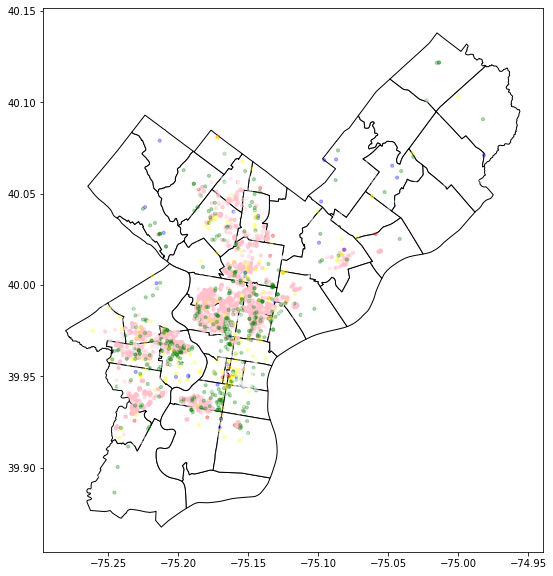

In [34]:
color_map = {"Adult Resources":"red","City Buildings":"blue","City Maintenance":"pink",
            "Community Center":"yellow","Housing":"green","Properties":"white"}

base = PhillyMap.plot(color='white', edgecolor='black', figsize=(10,10))
combined_df.plot(ax=base, markersize=10,color=combined_df.Resource_Category.map(color_map),alpha=0.3)

<AxesSubplot:>

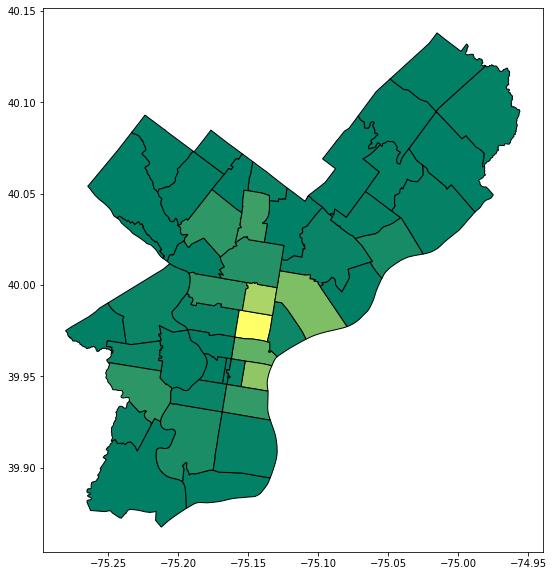

In [59]:

norm = matplotlib.colors.Normalize(vmin=0, vmax=1621, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.summer)
colors = PhillyMap.resources.fillna(0).apply(mapper.to_rgba)
PhillyMap.plot(color=colors,edgecolor='black',figsize=(10,10))